# Importing the libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Importing the dataset

In [40]:

stroke_encoded = pd.read_csv('dataset\healthcare-dataset-stroke-data.csv').drop(labels=['id'], axis=1)

In [41]:
stroke_encoded.shape

(5110, 11)

<Axes: ylabel='count'>

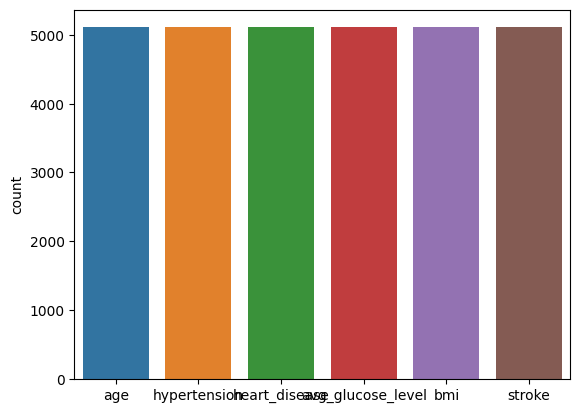

In [42]:
sns.countplot(data=stroke)

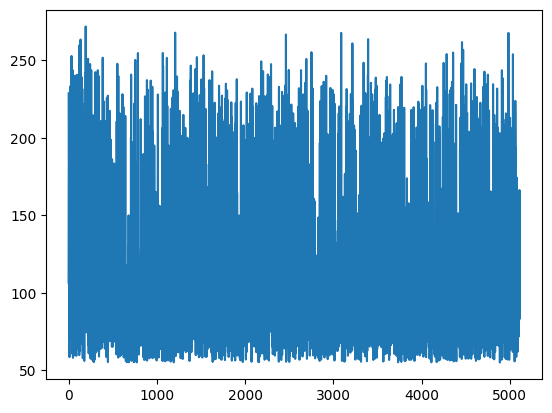

In [43]:
plt.plot("avg_glucose_level",data=stroke_encoded)

(array([1250., 1790.,  956.,  310.,  154.,   91.,  209.,  217.,  108.,
          25.]),
 array([ 55.12 ,  76.782,  98.444, 120.106, 141.768, 163.43 , 185.092,
        206.754, 228.416, 250.078, 271.74 ]),
 <BarContainer object of 10 artists>)

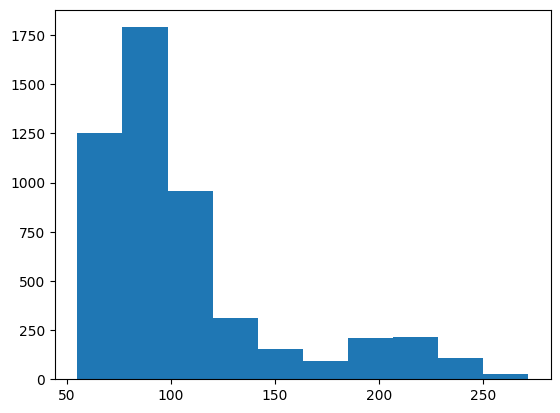

In [44]:
plt.hist("avg_glucose_level",data=stroke_encoded)

In [45]:
stroke_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [46]:
stroke_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [47]:
stroke_encoded.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [48]:
stroke_encoded['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

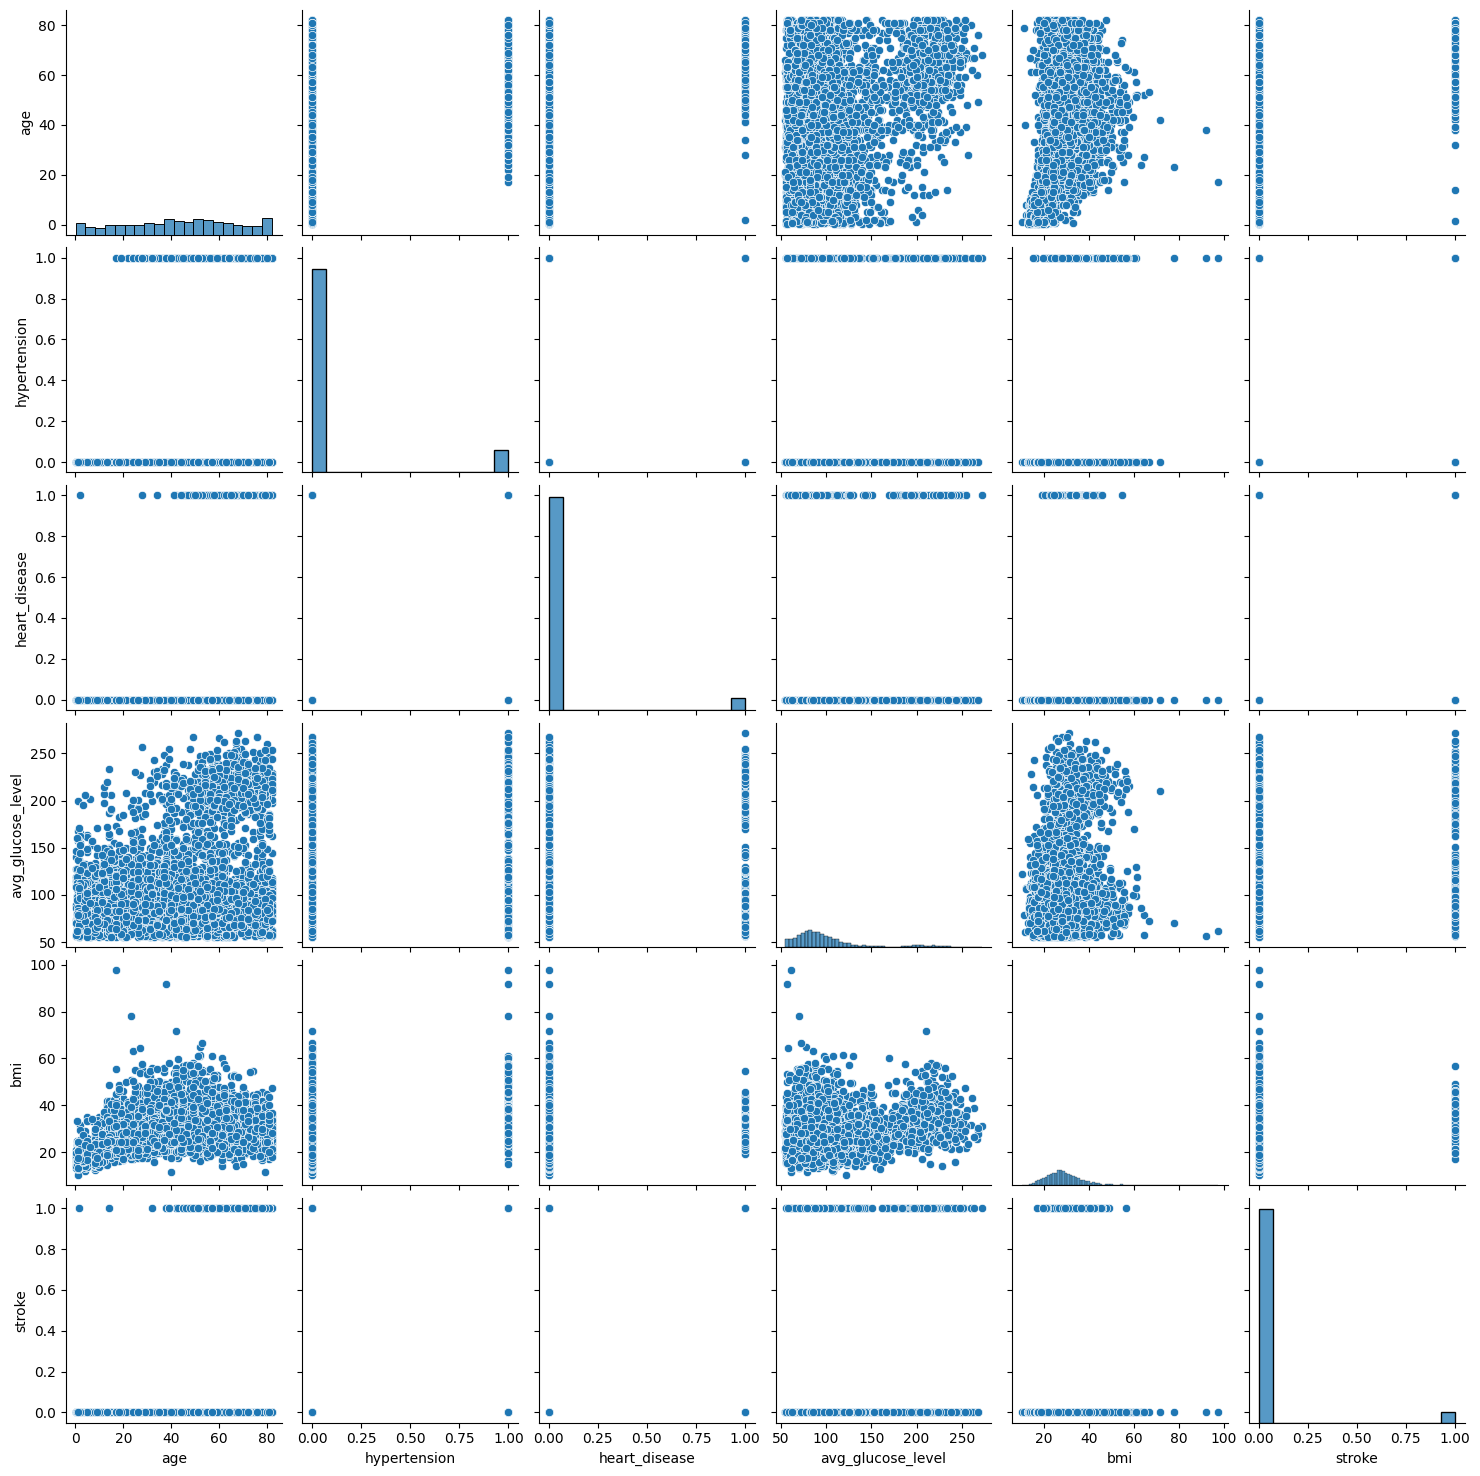

In [49]:
sns.pairplot(stroke_encoded)

In [50]:
stroke_encoded = pd.get_dummies(stroke)

# Correlation Heatmap


<Axes: >

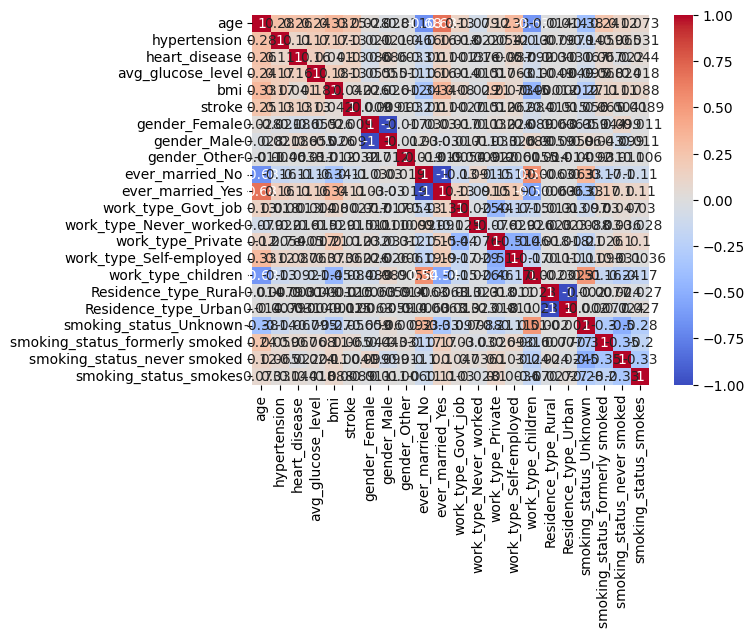

In [51]:
sns.heatmap(stroke_encoded.corr(), cmap='coolwarm', annot=True)

# Splitting the dataset into dependent and independent

In [52]:
X = stroke.drop('stroke', axis='columns')
y = stroke['stroke']

In [53]:
X.columns.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [54]:
X.gender.unique().tolist()

['Male', 'Female', 'Other']

# Handle missing data

In [55]:
imputer = SimpleImputer(strategy='median')
imputer.fit(X.iloc[:,8:9])
X.iloc[:,8:9] = imputer.transform(X.iloc[:,8:9])

# Encoding categorical data

In [56]:
cat_feature = X[['gender','ever_married', 'work_type', 'Residence_type','smoking_status']]

In [57]:
cat_feature

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
encoders = []
for feature in cat_feature:
    enc = OneHotEncoder(drop='first')
    encoders.append((feature,enc.fit(X[[feature]])))

In [60]:
encoders

[('gender', OneHotEncoder(drop='first')),
 ('ever_married', OneHotEncoder(drop='first')),
 ('work_type', OneHotEncoder(drop='first')),
 ('Residence_type', OneHotEncoder(drop='first')),
 ('smoking_status', OneHotEncoder(drop='first'))]

In [61]:
dummy_gender = encoders[0][1].transform(X[['gender']]).toarray()
dummy_gender.shape

(5110, 2)

In [62]:
dummy_gender

array([[1., 0.],
       [0., 0.],
       [1., 0.],
       ...,
       [0., 0.],
       [1., 0.],
       [0., 0.]])

In [63]:
dummy_ever_married = encoders[1][1].transform(X[['ever_married']]).toarray()
dummy_ever_married.shape

(5110, 1)

In [64]:
dummy_work_type = encoders[2][1].transform(X[['work_type']]).toarray()
dummy_work_type.shape

(5110, 4)

In [65]:
dummy_work_type = encoders[2][1].transform(X[['work_type']]).toarray()
dummy_work_type.shape

(5110, 4)

In [66]:
dummy_Residence_type = encoders[3][1].transform(X[['Residence_type']]).toarray()
dummy_Residence_type.shape

(5110, 1)

In [67]:
dummy_smoking_status = encoders[4][1].transform(X[['smoking_status']]).toarray()
dummy_smoking_status.shape

(5110, 3)

In [68]:
#X.drop(cat_feature,axis=1,inplace=True)

In [69]:
gender_df  =pd.DataFrame(dummy_gender,columns=X['gender'].unique().tolist()[1:])
X = pd.concat([X,gender_df], axis=1)
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Female,Other
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0,0.0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,0.0,0.0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1.0,0.0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,0.0,0.0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,0.0,0.0


In [70]:
ever_married_df  =pd.DataFrame(dummy_ever_married,columns=X['ever_married'].unique().tolist()[1:])
X = pd.concat([X,ever_married_df], axis=1)
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Female,Other,No
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0,0.0,1.0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,0.0,0.0,1.0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1.0,0.0,1.0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,0.0,0.0,1.0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,0.0,0.0,1.0


In [71]:
work_type_df  =pd.DataFrame(dummy_work_type,columns=X['work_type'].unique().tolist()[1:])
X = pd.concat([X,work_type_df], axis=1)
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Female,Other,No,Self-employed,Govt_job,children,Never_worked
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [72]:
Residence_type_df  =pd.DataFrame(dummy_Residence_type,columns=X['Residence_type'].unique().tolist()[1:])
X = pd.concat([X,Residence_type_df], axis=1)
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Female,Other,No,Self-employed,Govt_job,children,Never_worked,Rural
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [73]:
smoking_status_df  =pd.DataFrame(dummy_smoking_status,columns=X['smoking_status'].unique().tolist()[1:])
X = pd.concat([X,smoking_status_df], axis=1)
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,Other,No,Self-employed,Govt_job,children,Never_worked,Rural,never smoked,smokes,Unknown
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [74]:
X.drop(cat_feature,axis=1,inplace=True)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Other,No,Self-employed,Govt_job,children,Never_worked,Rural,never smoked,smokes,Unknown
0,67.0,0,1,228.69,36.6,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,61.0,0,0,202.21,28.1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Splitting the dataset into the Training set and Test set

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify=y)

# Handle Imbalanced data

In [76]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print(X_train.shape)

(6806, 16)


# Training the Random Forest Regression model

In [77]:
model = RandomForestClassifier(n_estimators= 500, criterion= 'entropy')
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

# Predicting

In [78]:
y_pred = model.predict(X_test)

# Accuracy Score

In [79]:
print('\n Accuracy Score: ', round(accuracy_score(y_test, y_pred) * 100, 2), '%')


 Accuracy Score:  94.39 %


# Classification Report

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1458
           1       0.13      0.03      0.04        75

    accuracy                           0.94      1533
   macro avg       0.54      0.51      0.51      1533
weighted avg       0.91      0.94      0.93      1533



In [81]:
import pickle
model_dict ={'model':model,'encoders':encoders,'description':'success prediction model'}
with open('stroke_detect.pk','wb') as file:
    pickle.dump(model_dict,file)

In [82]:
def predict(data, model_dict):
    model=model_dict['model']
    encoders=model_dict['encoders']
    dummy_gender = encoders[0][1].transform(data.gender)
    dummy_ever_married = encoders[0][1].transform(data.ever_married)
    dummy_work_type = encoders[0][1].transform(data.work_type)
    dummy_Residence_type = encoders[0][1].transform(data.Residence_type)
    dummy_smoking_status = encoders[0][1].transform(data.smoking_status)
    data = pd.concat([data.drop(['gender'],axis = 1),dummy_gender],axis =1)
    data = pd.concat([data.drop(['ever_married'],axis = 1),dummy_ever_married],axis =1)
    data = pd.concat([data.drop(['work_typer'],axis = 1),dummy_work_type],axis =1)
    data = pd.concat([data.drop(['Residence_type'],axis = 1),dummy_Residence_type],axis =1)
    data = pd.concat([data.drop(['smoking_status'],axis = 1),dummy_smoking_status],axis =1)
    print(data.shape)
    result = model.predict(data)
    return result

In [83]:
encoders

[('gender', OneHotEncoder(drop='first')),
 ('ever_married', OneHotEncoder(drop='first')),
 ('work_type', OneHotEncoder(drop='first')),
 ('Residence_type', OneHotEncoder(drop='first')),
 ('smoking_status', OneHotEncoder(drop='first'))]

In [84]:
e = encoders[1][1]


In [85]:
e.transform([["Yes"]]).toarray()

c:\Users\raj2s\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1.]])